In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv
/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

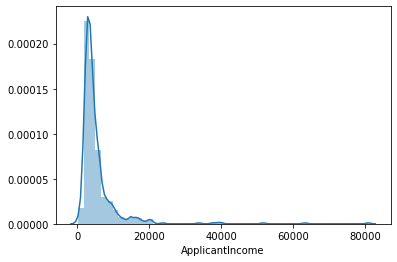

In [9]:
sns.distplot(data.ApplicantIncome)

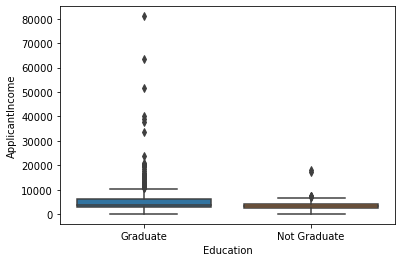

In [10]:
sns.boxplot(y = data.ApplicantIncome,x = data.Education)

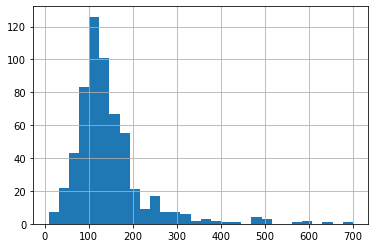

In [11]:
data['LoanAmount'].hist(bins =30 )

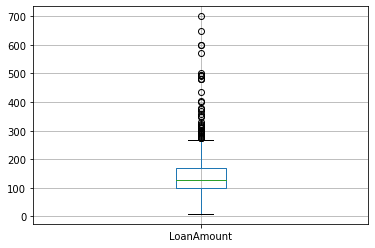

In [12]:
data.boxplot('LoanAmount')

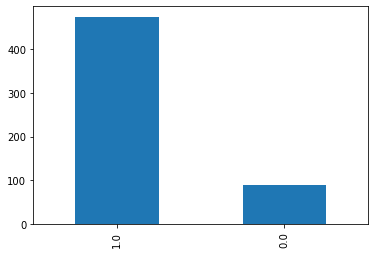

In [13]:
data['Credit_History'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Problity of getting the loan')

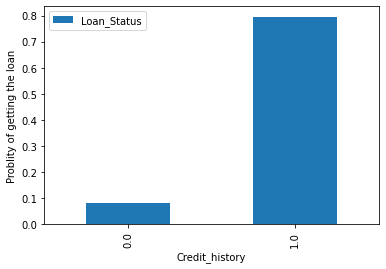

In [14]:
data.pivot_table(index= 'Credit_History',values = 'Loan_Status',aggfunc = lambda x:x.map({'Y':1,'N':0}).mean()).plot(kind = 'bar')
plt.xlabel('Credit_history')
plt.ylabel('Problity of getting the loan')

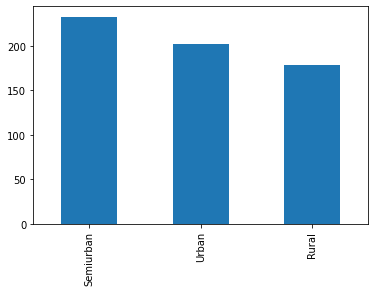

In [15]:
data['Property_Area'].value_counts().plot(kind = 'bar')

Text(0, 0.5, 'Problity of getting the loan')

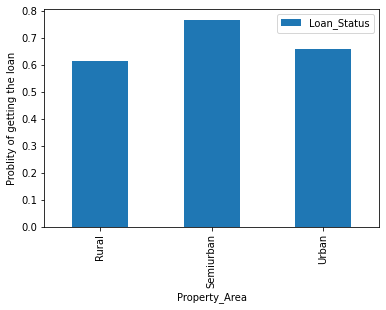

In [16]:
data.pivot_table(index= 'Property_Area',values = 'Loan_Status',aggfunc = lambda x:x.map({'Y':1,'N':0}).mean()).plot(kind = 'bar')
plt.xlabel('Property_Area')
plt.ylabel('Problity of getting the loan')

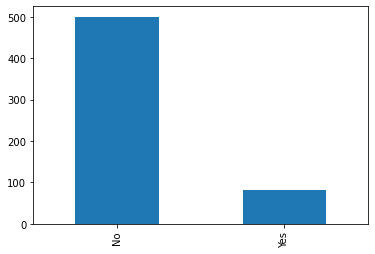

In [17]:
data['Self_Employed'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Problity of getting the loan')

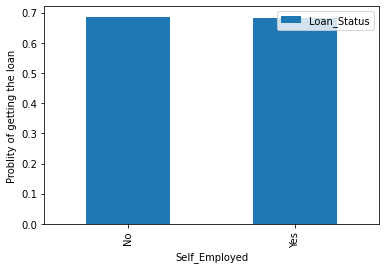

In [18]:
data.pivot_table(index= 'Self_Employed',values = 'Loan_Status',aggfunc = lambda x:x.map({'Y':1,'N':0}).mean()).plot(kind = 'bar')
plt.xlabel('Self_Employed')
plt.ylabel('Problity of getting the loan')

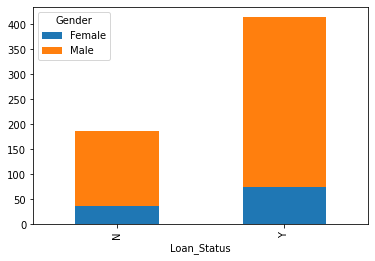

In [19]:
pd.crosstab(data.Loan_Status,data.Gender).plot(kind='bar',stacked =True)

In [20]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace = True)

In [21]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
data['Self_Employed'].value_counts()  


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
data['Self_Employed'].fillna('No',inplace = True)

In [24]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [25]:
data['TotalIncome'] = np.log(data.ApplicantIncome + data.CoapplicantIncome)

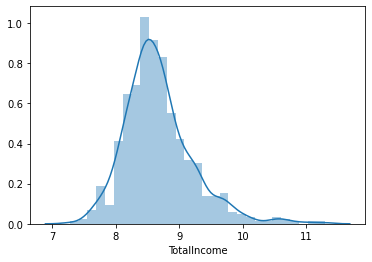

In [26]:
sns.distplot(data['TotalIncome'])

In [27]:
data = data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"],axis=1)

In [28]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515


In [29]:
X = data.drop('Loan_Status',1)
y = data.Loan_Status

In [30]:
X = pd.get_dummies(X)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 10000)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [33]:
classifier.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

82.11382113821138